# [DAY_8]_Positive_and_negative_stacked_bar_chart

In [1]:
import matplotlib
from matplotlib import transforms, pyplot as plt
import numpy as np

%matplotlib inline
#%matplotlib

In [2]:
# define colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

In [6]:
plt.rcParams['font.family'] = 'NanumGothic'
# 수학 텍스트 굵게 및 이탤릭체 폰트 패밀리를 Arial로 설정
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'NanumGothic:bold'
matplotlib.rcParams['mathtext.it'] = 'NanumGothic:italic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [15]:
# # directors by year
X = ['24년3월\n현재', '25년\n전망', '26년\n전망', '27년\n전망', '28년\n전망', '29년\n전망']
YA = np.array([0, -28, -44, -62, -77, -99]) # attrition
YT = np.array([190, 162, 146, 128, 113, 91]) # today
YP = np.array([0, 7, 10, 14, 16, 22]) # promoted
YQ = np.array([0, 4, 4, 4, 4, 4]) # acquisition
YU = np.array([0, 28, 50, 68, 91, 112]) # unmet gap

Text(-1.45, 280, '시간에 따른 예상 팀장 인원수')

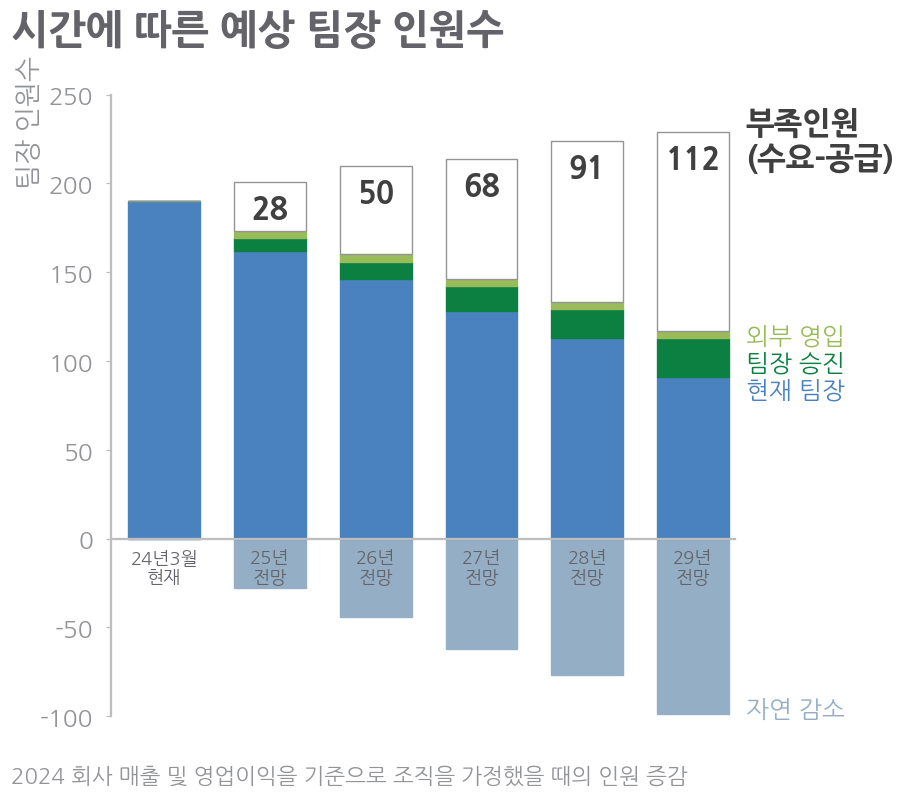

In [19]:
# 새로운 그림 생성
fig, ax1 = plt.subplots(figsize=(9.5, 7.2),  # 그림의 너비, 높이(인치)
                        dpi=110)  # 그림의 해상도

# 그림의 여백을 설정하여 subplot 레이아웃 조정
fig.subplots_adjust(left=0.103, right=0.7, top=0.881, bottom=0.096)

# y, x-축의 데이터 제한 설정
ax1.set_ylim([-100, 250])
ax1.set_xlim([-0.5, 5.4])
# x-축을 0으로 이동
ax1.spines['bottom'].set_position('zero')

# 막대 그래프 그리기
plt.bar(list(range(0, 6)), YA, width=0.68, color=BLUE4, 
        edgecolor=BLUE4, linewidth=0.9)
plt.bar(list(range(0, 6)), YT, width=0.68, color=BLUE2, 
        edgecolor=BLUE2, linewidth=0.9)
plt.bar(list(range(0, 6)), YP, width=0.68, bottom=YT, color=GREEN1, 
        edgecolor=GREEN1, linewidth=0.9)
plt.bar(list(range(0, 6)), YQ, width=0.68, bottom=YT + YP, color=GREEN2, 
        edgecolor=GREEN2, linewidth=0.9)
white_bars = plt.bar(list(range(0, 6)), YU, width=0.68, bottom=YT + YP + YQ, 
                     color='white', edgecolor=GRAY7, linewidth=0.9)

# 각 막대에 수치 데이터 레이블 추가
for i, b in enumerate(white_bars):
    if YU[i] == 0:
        continue
    x = b.get_x() + b.get_width() / 2  # 막대의 x-중앙
    y = b.get_y() + b.get_height() - 20  # 막대의 y-상단
    ax1.text(x, y,
             str(YU[i]),
             fontsize=20,
             fontweight='bold',
             horizontalalignment='center',
             color=GRAY2)

# 수치 데이터 레이블을 위한 텍스트 추가
ax1.text(5.5, y, '부족인원\n(수요-공급)', fontsize=20, fontweight='bold', 
         color=GRAY2)

# 다른 막대를 라벨링하는 텍스트 추가
ax1.text(5.5, 110, '외부 영입', fontsize=16, color=GREEN2)
ax1.text(5.5, 95, '팀장 승진', fontsize=16, color=GREEN1)
ax1.text(5.5, 80, '현재 팀장', fontsize=16, color=BLUE2)
ax1.text(5.5, -100, '자연 감소', fontsize=16, color=BLUE4)

# 축 객체의 속성 설정 (모든 문제에 대한 눈금과 라벨 표시)
plt.setp(ax1, xticks=list(range(0, 6)), xticklabels=X)

# 차트 테두리 제거
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_color(GRAY9)
ax1.spines['left'].set_color(GRAY9)
ax1.spines['left'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)

# y 눈금 색상 변경
ax1.tick_params(axis='y', colors=GRAY9)
# x 눈금 숨기기
ax1.tick_params(bottom=False)

# x 눈금 라벨 모양 설정
for item in ax1.get_xticklabels():
    item.set_fontsize(12)
    item.set_color(GRAY4)
    # x 눈금 라벨을 아래로 약간 이동시키기 위해 변환 사용
    offset = transforms.ScaledTranslation(0, 0, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)

# y 눈금 라벨 모양 설정
for item in ax1.get_yticklabels():
    item.set_fontsize(16)
    item.set_color(GRAY7)
    # y 눈금 라벨을 왼쪽으로 약간 이동시키기 위해 변환 사용
    offset = transforms.ScaledTranslation(-0.07, 0, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)

# 축 제목
ax1.text(-1.4, 200, '팀장 인원수', fontsize=17.5, rotation='vertical', 
         color=GRAY7)

# 데이터 소스 설명을 담은 각주 추가
plt.text(-1.45, -137,
         '2024 회사 매출 및 영업이익을 기준으로 조직을 가정했을 때의 인원 증감',
         fontsize=14.5, color=GRAY7)

# 그림 제목
plt.text(-1.45, 280, '시간에 따른 예상 팀장 인원수', 
         fontsize=26, color=GRAY4, weight ='bold' )
